In [1]:
import networkx as nx
G = nx.Graph()

In [4]:
num_nodes=int(input("Enter number of nodes in the graph:"))

#addinng the nodes into the graph
for i in range(num_nodes):
    G.add_node(i)

#accepting the adjacency matrix as input
print("Enter the adjacency matrix:")
adj_mat=[]
neighbours={}
for i in range (num_nodes):
    x = [int(x) for x in input("Enter the row : ").split()]
    adj_mat.append(x)
for i in range(num_nodes):
    l=[]
    for j in range(num_nodes):
        k=adj_mat[i][j]
        if(k==1):
            G.add_edge(i, j)
            l.append(j)
    neighbours[i]=l

Enter number of nodes in the graph:6
Enter the adjacency matrix:
Enter the row : 0 1 0 1 1 0
Enter the row : 1 0 1 0 1 0
Enter the row : 1 0 0 0 0 1
Enter the row : 0 1 0 1 0 1
Enter the row : 0 1 0 1 1 1
Enter the row : 1 1 1 0 1 0


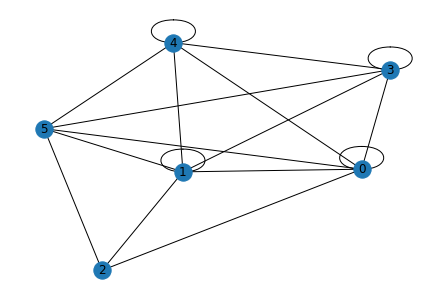

In [5]:
nx.draw(G,with_labels=True)

In [6]:
print("Enter the weights and the current status for each node:")
weight_st=[]
for i in range(num_nodes):
    x = [int(x) for x in input("Enter the weight and status : ").split()]
    weight_st.append(x)

print("The weight and status of each node is as follows: ",weight_st)
print(neighbours)

Enter the weights and the current status for each node:
Enter the weight and status : 4 2
Enter the weight and status : 5 4
Enter the weight and status : 3 2
Enter the weight and status : 2 2
Enter the weight and status : 5 5
Enter the weight and status : 4 3
The weight and status of each node is as follows:  [[4, 2], [5, 4], [3, 2], [2, 2], [5, 5], [4, 3]]
{0: [1, 3, 4], 1: [0, 2, 4], 2: [0, 5], 3: [1, 3, 5], 4: [1, 3, 4, 5], 5: [0, 1, 2, 4]}


In [8]:
def job_allocation(systems,src):
    systems.pop(0)
    for system in systems:
        if(weight_st[system][0]>weight_st[system][1]):
            print("")
            print("The new job is allocated to the system or node:",system)
            print("The weight and the current status of the node Before allocation of new job:",weight_st)
            weight_st[system][1]=weight_st[system][1]+1
            print("The weight and the current status of the node After allocation of new job:",weight_st)
            t=nx.shortest_path(G, source=src, target=system)
            print("Number migrations for job allocation required is:",len(t)-1)
            return weight_st
        else:
            continue

    print("")
    print("No system in the network are free")
    return weight_st

In [13]:
def bfs(visited, graph, node):
    list_return=[]
    visited.append(node)
    queue.append(node)
    while queue:          # Creating loop to visit each node
        m = queue.pop(0)
        list_return.append(m)
        print (m, end = " ")

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return list_return

In [15]:
new_job= [int(x) for x in input("Enter the systems at which new jobs is to be allocated: ").split()]
print(new_job)
l=len(new_job)

for i in range(l):
    visited = [] # List for visited nodes.
    queue = []     #Initialize a queue
    if(weight_st[new_job[i]][0]>weight_st[new_job[i]][1]):
        print("")
        print("The new job is allocated to the system or node:",new_job[i])
        print("number migrations for job allocation required is:",0)
    else:
        print("Following is the Breadth-First Search")
        list_return=bfs(visited, neighbours, new_job[i])
        weight_st=job_allocation(list_return,new_job[i])

Enter the systems at which new jobs is to be allocated: 3 4 2
[3, 4, 2]
Following is the Breadth-First Search
3 1 5 0 2 4 
The new job is allocated to the system or node: 2
The weight and the current status of the node Before allocation of new job: [[4, 4], [5, 5], [3, 2], [2, 2], [5, 5], [4, 4]]
The weight and the current status of the node After allocation of new job: [[4, 4], [5, 5], [3, 3], [2, 2], [5, 5], [4, 4]]
Number migrations for job allocation required is: 2
Following is the Breadth-First Search
4 1 3 5 0 2 
No system in the network are free
Following is the Breadth-First Search
2 0 5 1 3 4 
No system in the network are free
